<a href="https://colab.research.google.com/github/Avuraedor/Avuraedor/blob/main/Wk5_LogReg_Decision_Tree_Regressor%2C_Support_Vector_Regressor_and_a_Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR, SVC
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [3]:
df= pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')

In [4]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

<Axes: xlabel='cholesterol', ylabel='target'>

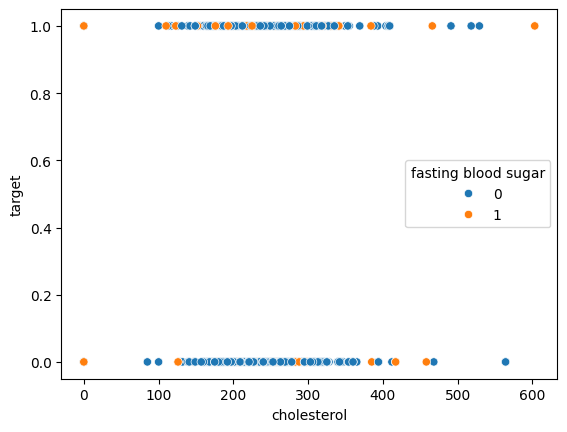

In [13]:
sns.scatterplot(x='cholesterol',y='target',data=df,hue='fasting blood sugar')

<Axes: >

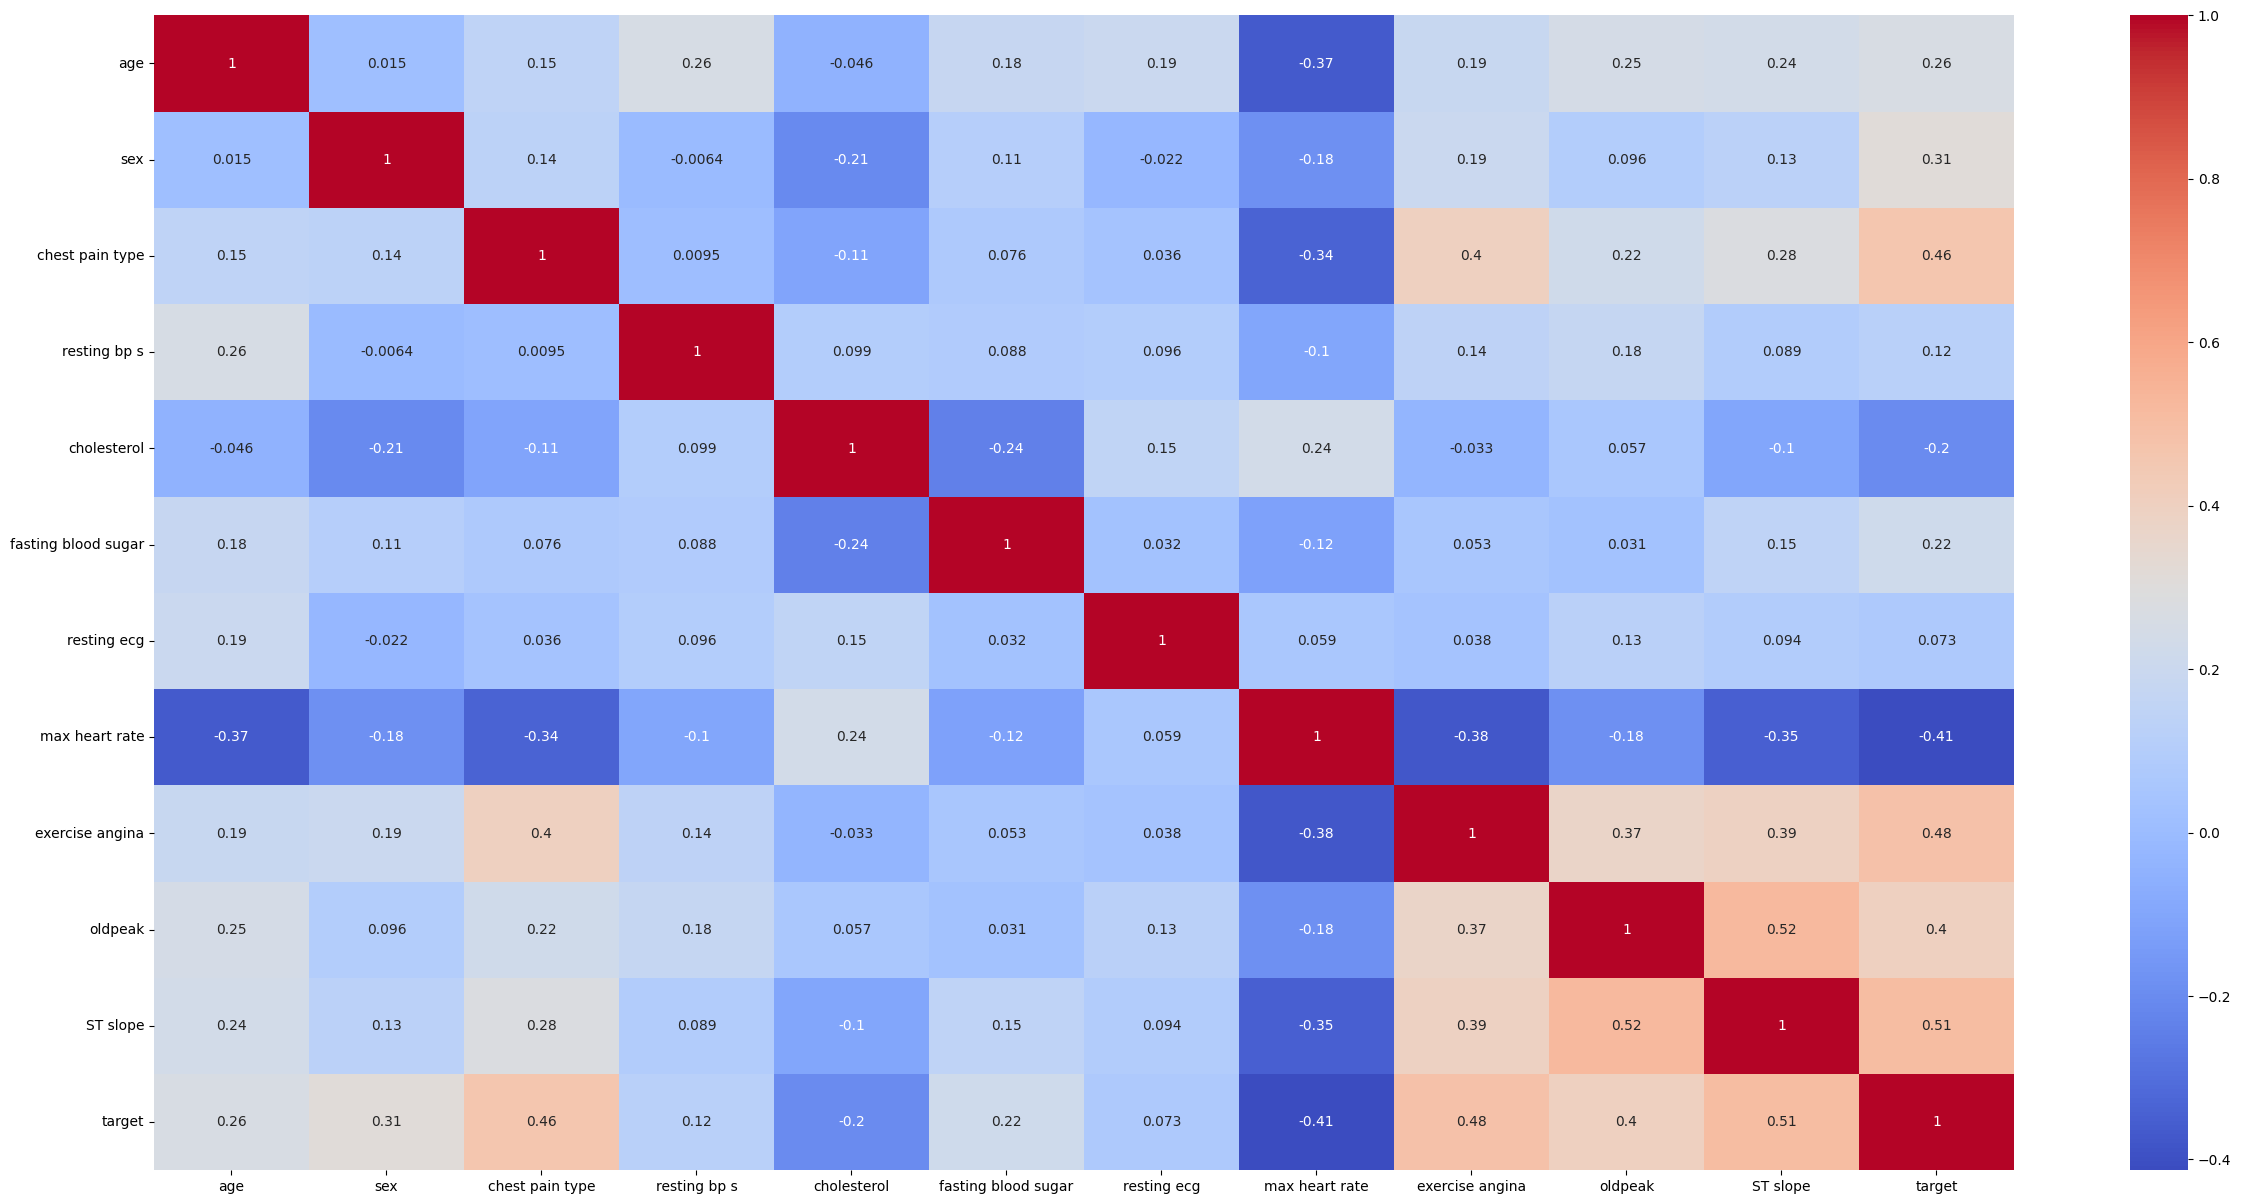

In [14]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [16]:
# Drop columns with low correlation with fasting blood sugar

df.drop(['oldpeak', 'exercise angina', 'resting ecg'], axis=1, inplace=True)

In [17]:
# Data Splitting

x= df.drop('fasting blood sugar', axis=1)
y= df['fasting blood sugar']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1000)

In [18]:
# Data Scaling

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
from math import log
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

pred=logreg.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86       179
           1       0.62      0.17      0.27        59

    accuracy                           0.77       238
   macro avg       0.70      0.57      0.56       238
weighted avg       0.74      0.77      0.72       238



In [20]:
# Decision Tree

dtcr = DecisionTreeClassifier()
dtcr.fit(x_train, y_train)

pred=dtcr.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       179
           1       0.58      0.58      0.58        59

    accuracy                           0.79       238
   macro avg       0.72      0.72      0.72       238
weighted avg       0.79      0.79      0.79       238



In [21]:
# Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

pred=rfc.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       179
           1       0.68      0.47      0.56        59

    accuracy                           0.82       238
   macro avg       0.76      0.70      0.72       238
weighted avg       0.80      0.82      0.80       238



In [22]:
# Support Vector Classifier

svc = SVC()
svc.fit(x_train, y_train)

pred=svc.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       179
           1       0.71      0.20      0.32        59

    accuracy                           0.78       238
   macro avg       0.75      0.59      0.59       238
weighted avg       0.77      0.78      0.73       238



In [23]:
# Random Forest Regressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

pred=rfr.predict(x_test)
print(mean_squared_error(y_test,pred))

0.1320966386554622
